In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np

import roc_results

In [2]:
response = requests.get('http://localhost:8000/result/')
rec = []
for r in response.json():
    svm = r.get('algorithm').get('svm')
    if svm.get('kernel') == 'linear':
        rec.append({
            'kernel': svm.get('kernel'),
            'c': svm.get('c'),
            'roc_auc_score': r.get('roc_auc_score'),
            'stock': r.get('stock')
        })
df = pd.DataFrame(rec)

In [3]:
log_res = []
for i, row in df.iterrows():
    log_res.append(roc_results.results.get(row['stock']))
df['log_res'] = log_res
df['diff'] = df['roc_auc_score'] - log_res

In [4]:
print(len(df['stock'].unique()))
print(len(df[df['log_res'] <= df['roc_auc_score']]['stock'].unique()))

98
62


In [5]:
df[df['log_res'] <= df['roc_auc_score']]

,c,kernel,roc_auc_score,stock,log_res,diff
0,100.000,linear,0.563885,9094,0.562067,0.001818
1,1000.000,linear,0.563885,9094,0.562067,0.001818
4,1.000,linear,0.550741,9270,0.550734,0.000007
5,10.000,linear,0.550741,9270,0.550734,0.000007
6,100.000,linear,0.550741,9270,0.550734,0.000007
7,1000.000,linear,0.550741,9270,0.550734,0.000007
10,1.000,linear,0.557572,10166,0.556248,0.001324
11,10.000,linear,0.557572,10166,0.556248,0.001324
12,100.000,linear,0.557572,10166,0.556248,0.001324
13,1000.000,linear,0.557255,10166,0.556248,0.001007


In [6]:
df.groupby('stock').aggregate({'roc_auc_score': np.max})

,roc_auc_score
stock,
10166,0.557893
10470,0.594828
10484,0.545433
10508,0.567924
10795,0.605074
1080,0.593027
10887,0.547967
11038,0.588559
1113,0.572656


In [7]:
bests = []
df_best_agg = df.groupby('stock', as_index=False)['diff'].idxmax()
df_bests = df.loc[df_best_agg]
df_bests.index = df_bests['stock']

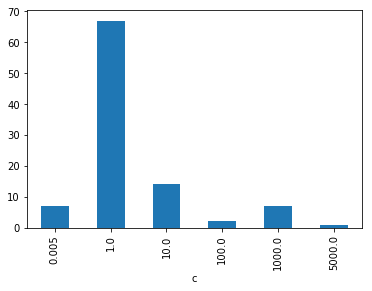

In [8]:
df_bests.groupby('c')['c'].count().plot(kind='bar')

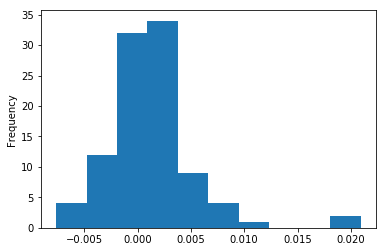

In [9]:
df_bests['diff'].plot(kind='hist')

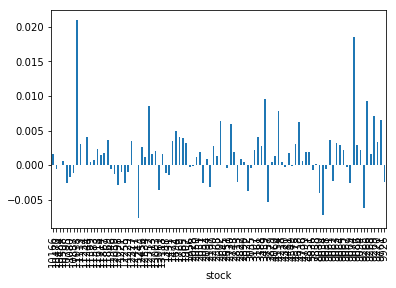

In [10]:
df_bests['diff'].plot(kind='bar')

In [11]:
df.sort_values(by='diff')

,c,kernel,roc_auc_score,stock,log_res,diff
564,0.0001,linear,0.500000,2028,0.616323,-0.116323
373,0.0010,linear,0.500000,2197,0.614852,-0.114852
372,0.0001,linear,0.500000,2197,0.614852,-0.114852
157,0.0010,linear,0.500000,12098,0.611904,-0.111904
156,0.0001,linear,0.500000,12098,0.611904,-0.111904
384,0.0001,linear,0.500000,12552,0.611180,-0.111180
385,0.0010,linear,0.500000,12552,0.611180,-0.111180
96,0.0001,linear,0.500000,1221,0.610522,-0.110522
97,0.0010,linear,0.500000,1221,0.610522,-0.110522
565,0.0010,linear,0.507017,2028,0.616323,-0.109307


In [12]:
df_bests[df_bests['c'] == 0.005]

,c,kernel,roc_auc_score,stock,log_res,diff
stock,,,,,,
10166,0.005,linear,0.557893,10166,0.556248,1.644600e-03
11399,0.005,linear,0.582625,11399,0.582127,4.979190e-04
2051,0.005,linear,0.556369,2051,0.554416,1.953221e-03
2645,0.005,linear,0.572117,2645,0.572117,-1.110223e-16
2822,0.005,linear,0.567489,2822,0.566647,8.423915e-04
9061,0.005,linear,0.550914,9061,0.547274,3.639690e-03
9270,0.005,linear,0.554034,9270,0.550734,3.299837e-03
